# Condensatore di Epino (II turno) 

Componenti del gruppo:

* De Marchi Nicola 
* Schio Michele 1141482

**Premessa**

Nel seguito verrà utilizzata la funzione `scipy.optimyze.curve_fit()` per stimare i parametri delle relazioni funzionale. Questo metodo implementa la regressione ai minimi quadrati insenso classico e restituisce, oltre ai parametri richiesti, la matrice delle covarianze in cui la diagonale contiene i valori della varianza dei parametri stimati.

per la gestione dei dati verrà utilizzata la librearia `pandas`, per i calcoli e la rappresenzione verranno utilizzati `numpy` e `matplotlib.pyplot` rispettivamente.


In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.constants import epsilon_0 as e0 


## Risultati prima parte
$$ tot = segnale - fondo $$

calcolo del segnale netto

possibili errori sistemici

In [88]:
df=pd.read_csv('data1parte.csv', header=0)
# carica totale
segnale, fondo = df.values[:,1], df.values[:,3]
q = segnale -fondo
volt = df.values[:,0]
df


,voltaggio,Segnale,Errore,Fondo,Errore.1
0,60,19.32,0.005781,0.005440,0.005965
1,50,19.08,0.005077,0.007715,0.005291
2,40,16.10,0.009574,0.007260,0.005512
3,30,12.56,0.009498,0.004985,0.005124
4,20,8.62,0.009218,0.004985,0.005124
5,10,4.29,0.008902,0.004985,0.005124


## Interpretazione e commenti prima parte

fit relazione :
$$ Q = q_0 + C V $$
 
in un condensatore piano indefinito:
$$ C = \frac{ \Sigma \epsilon _0}{ d} $$

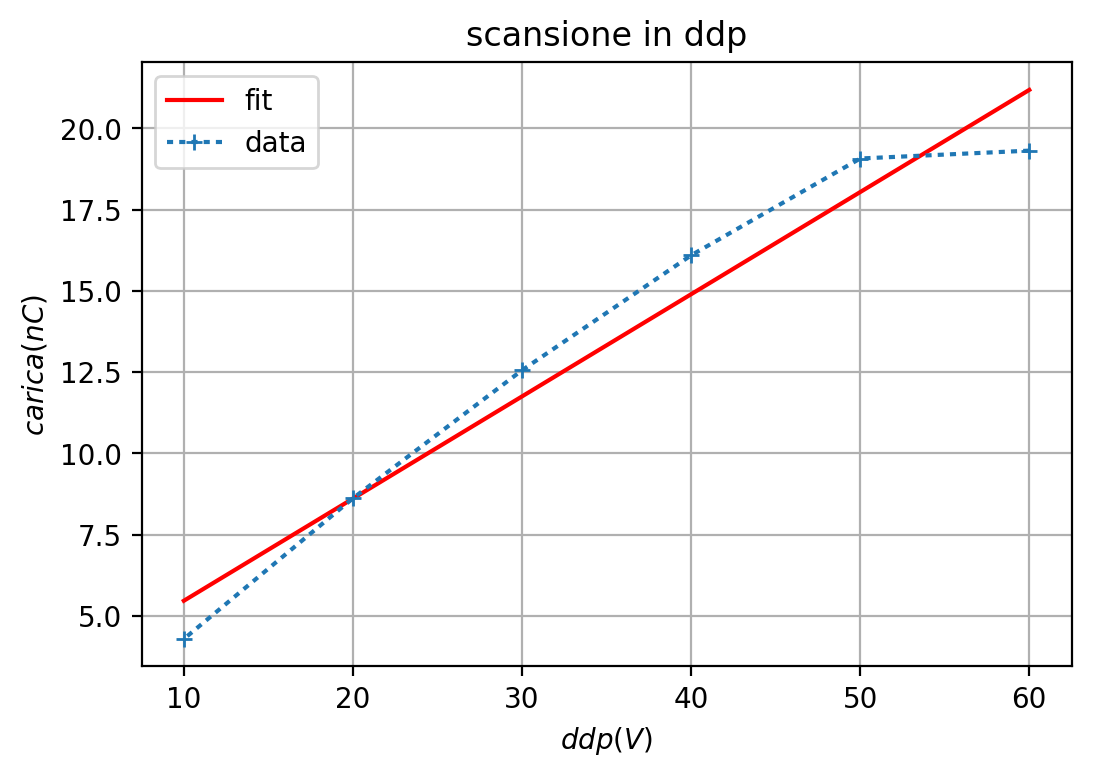


qo: 2.317 +-1.319nC

C: 0.314 +-0.034pF

distanza iniziale: 1.380mm


In [89]:
#funzione fit
def Q(v,qo,c):
    return qo + c*v

# ottimizzazione 
param, covar = curve_fit(Q, volt, q)
qo, C = param
er_q, er_c = np.diag(covar)**.5
# creazione grafico
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111)
plt.plot(volt, Q(volt, *param), 'r-', label='fit')
plt.plot(volt, q, marker = '+', linestyle= ':', label='data')
plt.title('scansione in ddp')
ax.set_ylabel('$carica (nC)$')
ax.set_xlabel('$ddp (V)$')
plt.legend(); plt.grid();plt.show()
# log
print('\nqo: {:.3f} +-{:.3f}nC'.format(qo, er_q) )
print('\nC: {:.3f} +-{:.3f}pF'.format(C, er_c))

#stima distanza iniziale, Area = 0.049
d0 = 0.049*e0/(C*10**(-12))
print('\ndistanza iniziale: {0:.3f}mm'.format(d0))


## Risultati seconda parte 
* ddp in scansione:  $ \Delta V = 60V $
* passo della vite:  $ passo = 1.5 \frac{mm}{giro} $
* calcolo spostamenti relativi e carica totale
$$ carica  = segnale - fondo $$

In [90]:
df=pd.read_csv('data2parte.csv', header=0)
# voltaggio (V), passo (mm/giro)
volt, passo = 60, 1.5
# spostamento relativo d - d0 (mm)
spos_rel = df.values[:,0]*passo
# spostamento assoluto d (mm)
spos =  spos_rel + d0
# carica q (nC)
q = df.values[:,1]-df.values[:,2]
new = {
    'giri': df.values[:,0],
    'd': spos,
    'd-d0': spos_rel,
    'segnale': df.values[:,1],
    'fondo': df.values[:,2],
    'q': q
}
pd.DataFrame(data=new)

,d,d-d0,fondo,giri,q,segnale
0,1.37973,0.00,0.01,0.0,19.31,19.32
1,2.12973,0.75,0.00,0.5,19.31,19.31
2,2.87973,1.50,0.01,1.0,15.31,15.32
3,3.62973,2.25,0.00,1.5,11.10,11.10
4,4.37973,3.00,0.01,2.0,8.96,8.97
5,5.12973,3.75,0.01,2.5,7.64,7.65
6,5.87973,4.50,0.00,3.0,6.69,6.69
7,6.62973,5.25,0.00,3.5,6.00,6.00
8,7.37973,6.00,0.00,4.0,5.43,5.43
9,8.12973,6.75,0.00,4.5,5.01,5.01


## Interpretazione e commenti terza parte

$$ Q(d) = \epsilon_0 \frac{ A}{ d+d_0} V + B $$

dove:

* $B$ è una costante di integrazione per compensare errori sistemici 
* $A = 0.049 m^2$ è l'area del piatto del condensatore

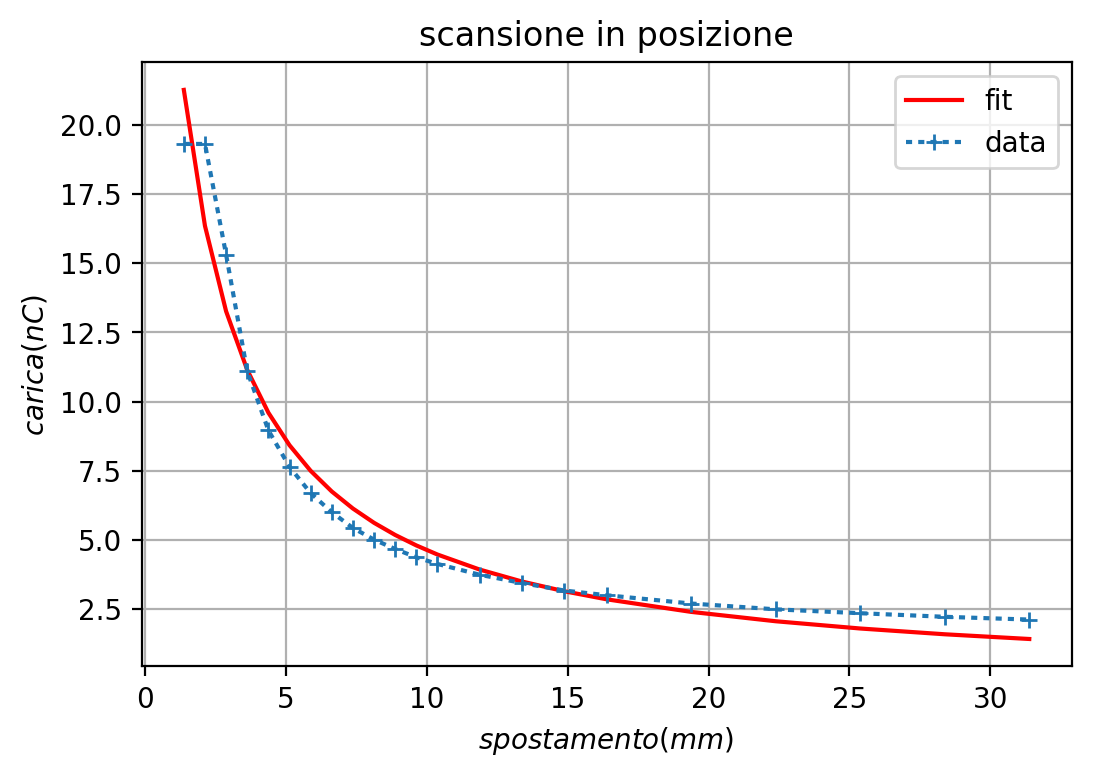


 eo:18.555 +-3.020pF/m

 do:1.155 +-0.413mm

 B:-0.259 +-0.646nC


In [91]:
# funzione da stimare
def Q(x,eo, do, B ):
    # dati Area = 0.049, V= 60
    return eo*60*0.049/(x+do) + B

# ottimizzazione
popt, pcov = curve_fit(Q, spos, q)
eo, do, B = popt
er_e, er_d, er_B = np.diag(pcov)**0.5
# creazione grafico
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111)
plt.plot(spos, Q(spos, *popt), 'r-', label='fit')
plt.plot(spos, q, marker = '+', linestyle= ':', label='data')
# formattazione
plt.title('scansione in posizione')
ax.set_ylabel('$carica (nC)$')
ax.set_xlabel('$spostamento (mm)$')
plt.legend(); plt.grid();plt.show()
# parametri di ottimizzazione
print('\n eo:{:.3f} +-{:.3f}pF/m'.format(eo, er_e))
print('\n do:{:.3f} +-{:.3f}mm'.format(do, er_d))
print('\n B:{:.3f} +-{:.3f}nC'.format(B, er_B))

# Conclusioni

* valore di e0
* stima della distanza iniziale
* validità dell'approssimazioni di condensatore indefinito

# Bibliografia
* Fisica in laborario Esculapio

In [92]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, version_information

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.5.3 64bit [GCC 6.3.0 20170118]
IPython 6.2.1
OS Linux 4.9.0 4 amd64 x86_64 with debian 9.2
numpy 1.12.1
scipy 0.18.1
matplotlib 2.0.0
version_information 1.0.3
Wed Nov 22 19:08:04 2017 CET